# Reti Neurali

In questo laboratorio vedremo come applicare le reti neurali al dataset **Iris**.
Iniziamo con l'import del dataset.

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [204]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Dividiamo il dataset di iris in train e test

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df["target"], test_size=0.3, random_state=42)

Per migliorare il training della rete neurale, standardizziamo tutte le features

## Classificazione multiclasse nelle Reti Neurali

Utilizzeremo la funzione Keras `to_categorical()` per trasformare le nostre categorie di output in vettori di classi binarie. Questo passaggio è spesso definito codifica "One-Hot". Questo permetterà di utilizzare una specifica funzione di loss per dati categorici.
One-Hot Encoding: Ogni bit rappresenta un valore dell'enum. per rappresentare n valori dell'enum servono n bit.

Ogni specie sarà rappresentata quindi come un vettore di classi binarie.

- Setosa [1 0 0]
- Versicolor [0 1 0]
- Virginica [0 0 1]

In [206]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [207]:
import keras

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Creazione del modello
Di seguito possiamo vedere un esempio di come una rete neurale può essere visualizzata. Ogni rete neurale è composta da questi tre costituenti principali.

- Strato di input
- $x$ numero di strati nascosti
- Strato di output

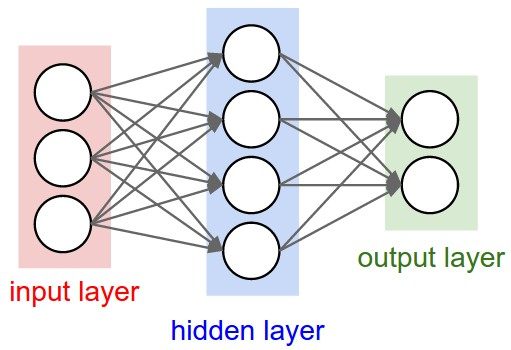

### Modello Keras
Keras offre un'API molto utile e di alto livello per gestire la creazione di reti neurali. Il [Keras Sequential Model](https://keras.io/getting-started/sequential-model-guide/) è definito come uno *stack lineare di strati nascosti* (quelli di input e output possono essere creati  implicitamente guardando la dimensione dell'IO). È perfetto per ciò di cui abbiamo bisogno per creare una rete neurale artificiale composta da nodi di input, output e nascosti. Definiamo il nostro modello e aggiungiamo i nostri strati.

Stiamo cercando di creare un modello che sarà simile a quello di seguito:

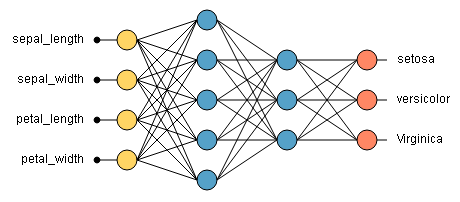



## Activation Functions

Una [Funzione di attivazione](https://en.wikipedia.org/wiki/Activation_function) in una rete neurale definisce l'output di un dato nodo dato il suo input (o set di input). Applicheremo due diverse funzioni di attivazione per ciascuno strato.

### Sigmoid
Una funzione sigmoidale è una funzione matematica che ha una curva a forma di "S" (curva sigmoidale). Spesso, la funzione sigmoide si riferisce al caso speciale della funzione logistica mostrata nella prima figura e definita come:

Qui vediamo il plot di una "Sigmoid Curve".

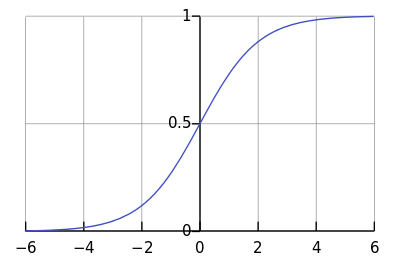

Il suo utilizzo nelle reti neurali è:
1. Funzione di attivazione che trasforma gli input lineari in output non lineari.
2. Limita l'output tra 0 e 1 in modo che possa essere interpretato come una probabilità.
3. Rende il calcolo più semplice rispetto alle funzioni di attivazione arbitrarie.

### Softmax

La funzione [Softmax](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/) è una generalizzazione della funzione logistica al caso in cui si vogliano gestire più classi.

La funzione Softmax è definita come:

softmax.svg

La funzione di attivazione Softmax ci consente di far fluire i nostri dati attraverso i livelli nascosti e di terminare con una delle classi definite:
- Setosa
- Versicolor
- Virginica

In [208]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
# Add an initial layer with 4 input nodes, and a hidden layer with 16 nodes.
# Apply the sigmoid activation function to that layer. (non è vero sta usando relu)
model.add(Dense(16, input_shape=(4,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
# Add another layer, connected to the layer with 16 nodes, containing three output nodes.
# Use the softmax activation function there.
model.add(Dense(3, activation='softmax'))


# Compile the model
#  - Categorical_CrossEntropy è una funzione di costo fatta apposta per multi-class classification
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

d:\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Verifichiamo quanti parameteri sarà necessario stimare per la rete neurale che stiamo definendo.


In [209]:
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

Effettuiamo il training della rete e valutiamo le performance. Utilizziamo una variabile "history" per visualizzare l'andamento della loss in fase di apprendimento.

In [210]:
from keras import Sequential
model: Sequential = model
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=5, verbose=1)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2948 - loss: 1.2060 - val_accuracy: 0.5238 - val_loss: 0.9323
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.8339 - val_accuracy: 0.9524 - val_loss: 0.7295
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8575 - loss: 0.6431 - val_accuracy: 0.9048 - val_loss: 0.6008
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7761 - loss: 0.5203 - val_accuracy: 1.0000 - val_loss: 0.4949
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9211 - loss: 0.4017 - val_accuracy: 0.9524 - val_loss: 0.4377
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9025 - loss: 0.4055 - val_accuracy: 0.9524 - val_loss: 0.3820
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9430 - loss: 0.3490 - val_accuracy: 1.0000 - val_loss: 0.2916
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2859 - val_accuracy: 1.0000 - val_loss

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


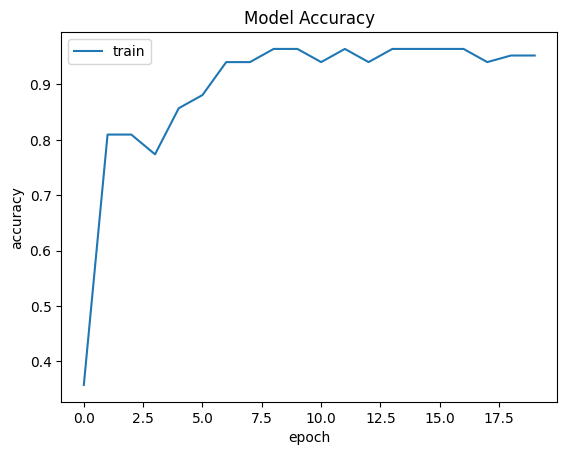

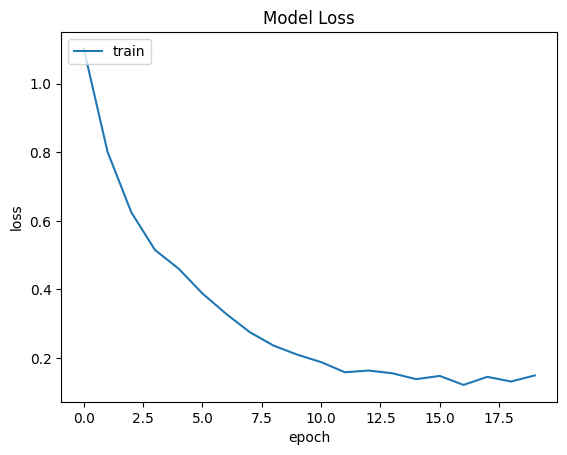

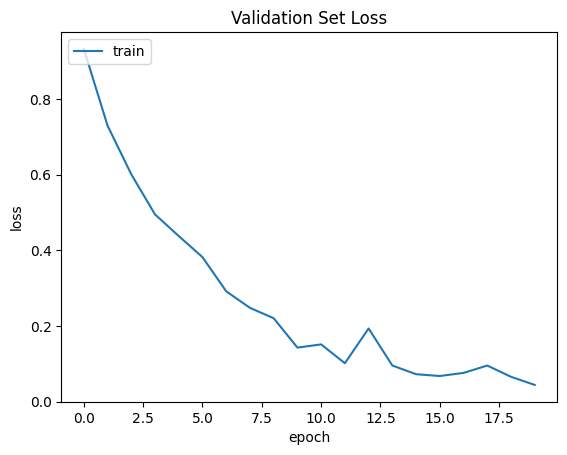

In [211]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for validation set loss
plt.plot(history.history['val_loss'])
plt.title('Validation Set Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Valutazione del modello: Loss e Accuratezza

Ora che abbiamo addestrato il nostro modello, possiamo valutarlo utilizzando i dati di test che abbiamo estratto prima. Utilizzando `evaluate()` ci aspettiamo i nostri valori di ritorno di perdita e accuratezza per il nostro set di test dato.

In [212]:
# Evaluate the model using the test data set.
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Output the accuracy of the model.
print("\n\nLoss: %6.4f\tAccuracy: %6.4f" % (loss, accuracy))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0583


Loss: 0.0546	Accuracy: 1.0000


## Inferenza

Per fare previsioni usando il nostro modello dobbiamo prima preparare i dati di input in modo che siano quelli attesi dal modello.


In [213]:
prediction = model.predict(X_test)
prediction

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[6.67245686e-03, 9.39980328e-01, 5.33472896e-02],
       [9.84400690e-01, 1.53422402e-02, 2.57106585e-04],
       [2.28265912e-04, 1.94979031e-02, 9.80273843e-01],
       [6.65789051e-03, 8.75546455e-01, 1.17795676e-01],
       [6.44132169e-03, 9.44729567e-01, 4.88290712e-02],
       [9.84066129e-01, 1.56727210e-02, 2.61106499e-04],
       [2.29870509e-02, 9.67444181e-01, 9.56874993e-03],
       [8.15366395e-04, 7.26812407e-02, 9.26503360e-01],
       [4.08702064e-03, 5.23025155e-01, 4.72887874e-01],
       [1.25175705e-02, 9.75635886e-01, 1.18465340e-02],
       [1.39550469e-03, 1.32813364e-01, 8.65791142e-01],
       [9.83462989e-01, 1.62677970e-02, 2.69126584e-04],
       [9.85588193e-01, 1.41739370e-02, 2.37925415e-04],
       [9.83225226e-01, 1.65018272e-02, 2.72998033e-04],
       [9.84682977e-01, 1.50623871e-02, 2.54589220e-04],
       [7.33868685e-03, 9.21224952e-01, 7.14364201e-02],
       [2.87040777e-04, 2.42013037e-02, 9.75511670e-01],
       [1.00458553e-02, 9.75589

## Assignment

1. Provare ad usare diverse funzioni di attivazione, come "tanh".
2. Quante epoche sono necessarie per raggiungere la convergenza?
3. Cosa succede cambiando l'architettura della rete?
4. Cosa succede cambiando la loss function?